In [1]:
using IntervalArithmetic

In [3]:
import Base.split

function split{T<:Real}(x::Interval{T}, n::Integer)
    
    width = diam(x) / n
    
    intervals = [Interval(x.lo + width*i, x.lo + width*(i+1)) for i in 0:n-1]
    
end

function split{T<:Real}(X::IntervalBox{2,T}, n::Integer, m::Integer=n)
    x, y = X
        
    x_intervals = split(x, m)
    y_intervals = split(y, n)
    
    boxes = IntervalBox{2,T}[]
    
    for i in x_intervals, j in y_intervals
        push!(boxes, IntervalBox(i, j))
    end
    
    boxes
    
end


split (generic function with 12 methods)

In [4]:
X = IntervalBox(0..1, 0..1)


input = split(X, 3)
input

9-element Array{IntervalArithmetic.IntervalBox{2,Float64},1}:
 IntervalBox([0.0, 0.3333333333333333],[0.0, 0.3333333333333333])                              
 IntervalBox([0.0, 0.3333333333333333],[0.3333333333333333, 0.6666666666666666])               
 IntervalBox([0.0, 0.3333333333333333],[0.6666666666666666, 1.0])                              
 IntervalBox([0.3333333333333333, 0.6666666666666666],[0.0, 0.3333333333333333])               
 IntervalBox([0.3333333333333333, 0.6666666666666666],[0.3333333333333333, 0.6666666666666666])
 IntervalBox([0.3333333333333333, 0.6666666666666666],[0.6666666666666666, 1.0])               
 IntervalBox([0.6666666666666666, 1.0],[0.0, 0.3333333333333333])                              
 IntervalBox([0.6666666666666666, 1.0],[0.3333333333333333, 0.6666666666666666])               
 IntervalBox([0.6666666666666666, 1.0],[0.6666666666666666, 1.0])                              

In [10]:
f(xx::IntervalBox) = ((x,y)=xx; IntervalBox(2x + y, x + y))

f (generic function with 1 method)

In [11]:
output = map(f, input)

9-element Array{IntervalArithmetic.IntervalBox{2,Float64},1}:
 IntervalBox([0.0, 1.0],[0.0, 0.6666666666666666])                                             
 IntervalBox([0.3333333333333333, 1.3333333333333333],[0.3333333333333333, 1.0])               
 IntervalBox([0.6666666666666666, 1.6666666666666667],[0.6666666666666666, 1.3333333333333335])
 IntervalBox([0.6666666666666666, 1.6666666666666667],[0.3333333333333333, 1.0])               
 IntervalBox([0.9999999999999999, 2.0],[0.6666666666666666, 1.3333333333333333])               
 IntervalBox([1.3333333333333333, 2.3333333333333335],[0.9999999999999999, 1.6666666666666667])
 IntervalBox([1.3333333333333333, 2.3333333333333335],[0.6666666666666666, 1.3333333333333335])
 IntervalBox([1.6666666666666665, 2.666666666666667],[0.9999999999999999, 1.6666666666666667]) 
 IntervalBox([1.9999999999999998, 3.0],[1.3333333333333333, 2.0])                              

In [12]:
include("draw_function_image.jl")

draw (generic function with 4 methods)

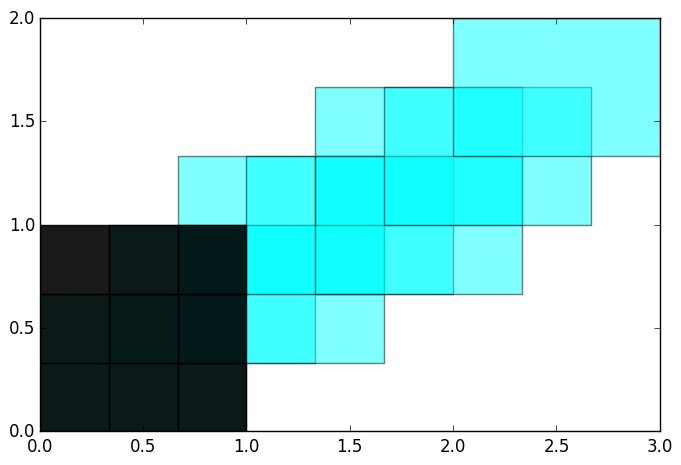

(0.0,3.0,0.0,2.0)

In [13]:
draw(output, "cyan")
draw(input, "black", 0.9)

axis("image")

In [14]:
using Interact

In [15]:
function draw_image(f, X, color="cyan")
    fig = figure()
    @manipulate for n in 1:100
        withfig(fig) do
            input = split(X, n)
            output = map(f, input)

            draw(output, color, 0.1)
            draw(input, "grey", 0.1)

            axis("image")
        end
    end
    
end

draw_image (generic function with 2 methods)

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"n",50,1:100,true)

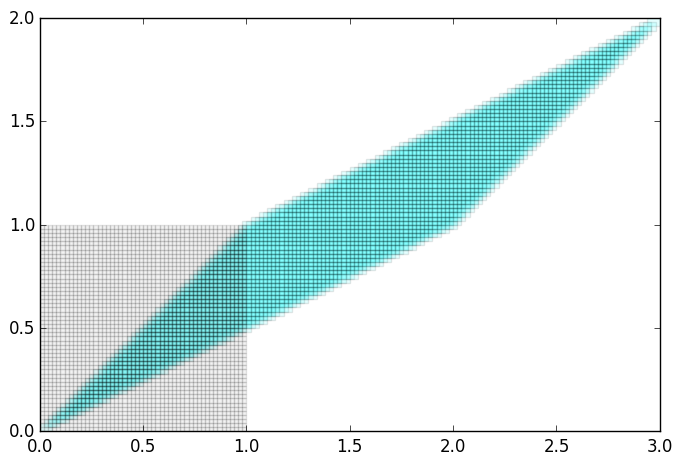

In [16]:
draw_image(f, IntervalBox(0..1, 0..1))

In [14]:
function standard_map(X::IntervalBox, k = 1.0)
    p, θ = X
    
    p′ = p + k*sin(θ)
    θ′ = θ + p′
    
    IntervalBox(p′, θ′)
end

standard_map (generic function with 2 methods)

In [15]:
function iterate(f, n, x)
    for i in 1:n
        x = f(x)
    end
    x
end

iterate (generic function with 1 method)

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"n",50,1:100,true)

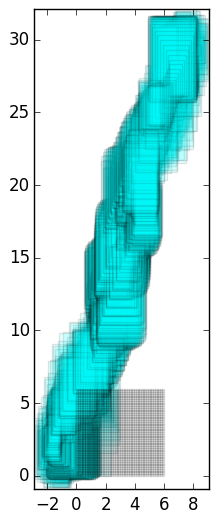

In [16]:
#@manipulate for i in 1:10, j in 1:10

i = 9
j = 8

#X = IntervalBox((i/10)*2pi..(i+1)/10*2pi, (j/10)*2pi..(j+1)/10*2pi)

X = IntervalBox(0..6, 0..6)

draw_image(x -> iterate(standard_map, 4, x), X)

#axis([0, 2pi, 0, 2pi])
    #axis("image")
#end

In [72]:
import Base.mod 
function mod(X::Interval, width::Real)
    
    
    @show X, width

    X /= width
    
    if diam(X) >= 1.
        return [Interval(0, width)]
    end
    
    a = X.lo - floor(X.lo)
    b = X.hi - floor(X.hi)
    
    if a < b
        return [Interval(a, b)*width]
        
    end
    
    return [Interval(0, b)*width, Interval(a, 1)*width]
    
end

mod (generic function with 42 methods)

In [37]:
mod(Interval(0.3, 0.5), 1)

1-element Array{IntervalArithmetic.Interval{Float64},1}:
 [0.3, 0.5]

In [38]:
mod(Interval(0.3, 1.2), 1)

2-element Array{IntervalArithmetic.Interval{Float64},1}:
 [0.0, 0.19999999999999996]
 [0.3, 1.0]                

In [39]:
mod(Interval(0.3, 1.5), 1)

1-element Array{IntervalArithmetic.Interval{Float64},1}:
 [0.0, 1.0]

In [40]:
function mod(X::IntervalBox, width::Real)
    x, y = X
    
    xx = mod(x, width)
    yy = mod(y, width)
    
    vec([IntervalBox(x, y) for x in xx, y in yy])
end

mod (generic function with 42 methods)

In [41]:
X = IntervalBox(0..0.5, 0.1..0.6)
mod(X, 1)

1-element Array{Any,1}:
 IntervalBox([0.0, 0.5],[0.09999999999999999, 0.6000000000000001])

In [42]:
X = IntervalBox(0..0.5, 0.9..1.1)
mod(X, 1)

2-element Array{Any,1}:
 IntervalBox([0.0, 0.5],[0.0, 0.10000000000000009])
 IntervalBox([0.0, 0.5],[0.8999999999999999, 1.0]) 

In [43]:
X = IntervalBox(0.8..1.2, 0.8..1.2)
mod(X, 1)

4-element Array{Any,1}:
 IntervalBox([0.0, 0.20000000000000018],[0.0, 0.20000000000000018])
 IntervalBox([0.7999999999999999, 1.0],[0.0, 0.20000000000000018]) 
 IntervalBox([0.0, 0.20000000000000018],[0.7999999999999999, 1.0]) 
 IntervalBox([0.7999999999999999, 1.0],[0.7999999999999999, 1.0])  

In [65]:
mod(6..7, IntervalArithmetic.two_pi(Float64))

2-element Array{IntervalArithmetic.Interval{Float64},1}:
 [0.0, 0.7168146928204147]             
 [5.999999999999998, 6.283185307179587]

In [48]:
mod(6..7, @interval(2π))

2-element Array{IntervalArithmetic.Interval{Float64},1}:
 [0.0, 0.7168146928204147]             
 [5.999999999999998, 6.283185307179587]

In [45]:
@interval(2π)

[6.283185307179586, 6.283185307179587]

In [46]:
2pi

6.283185307179586

In [47]:
2*@interval(pi)

[6.283185307179586, 6.283185307179587]

In [49]:
2pi

6.283185307179586

In [50]:
7 - ans

0.7168146928204138

In [77]:
function standard_map(X::IntervalBox, k = 1.0)
    p, θ = X
    
    p′ = mod2pi( p + k*sin(θ) )
    θ′ = mod2pi( θ + p′ )
    
    @show p′, θ′
    
    IntervalBox(p′, θ′)
end

standard_map (generic function with 2 methods)

In [82]:
function IntervalBox{T}(X::Vector{Interval{T}}, Y::Vector{Interval{T}})
    vec([IntervalBox(x, y) for x in X, y in Y])
end

IntervalArithmetic.IntervalBox{N,T}

In [58]:
X = IntervalBox(0..1, 0..1)

[0.0, 1.0] × [0.0, 1.0]

In [61]:
p, theta = X
p + sin(theta)

[0.0, 1.8414709848078967]

In [70]:
typeof(p + sin(theta))

IntervalArithmetic.Interval{Float64}

In [73]:
mod(p + sin(theta), IntervalArithmetic.two_pi(Float64))

(X,width) = ([0.0, 1.8414709848078967],[6.283185307179586, 6.283185307179587])

1-element Array{IntervalArithmetic.Interval{Float64},1}:
 [0.0, 1.8414709848078974]

In [75]:
mod2pi{T}(x::Interval{T}) = mod(x, IntervalArithmetic.two_pi(T))

mod2pi{T}(X::Vector{Interval{T}}) = map(mod2pi, X)

mod2pi (generic function with 2 methods)

In [54]:
mod2pi(6..7)

2-element Array{IntervalArithmetic.Interval{Float64},1}:
 [0.0, 0.7168146928204147]             
 [5.999999999999998, 6.283185307179587]

In [52]:
IntervalArithmetic.two_pi(Float64)


[6.283185307179586, 6.283185307179587]

In [84]:
standard_map(IntervalBox(0..1, 0..1))

(X,width) = ([0.0, 1.8414709848078967],[6.283185307179586, 6.283185307179587])

LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{IntervalArithmetic.Interval{T}}, ::Array{IntervalArithmetic.Interval{Float64},1})
This may have arisen from a call to the constructor IntervalArithmetic.Interval{T}(...),
since type constructors fall back to convert methods.
Closest candidates are:
  call{T}(::Type{T}, ::Any)
  convert{T<:Real}(::Type{T<:Real}, !Matched::Complex{T<:Real})
  convert{T<:Number}(::Type{T<:Number}, !Matched::Char)
  ...
while loading In[84], in expression starting on line 1


(X,width) = ([0.0, 2.8414709848078976],[6.283185307179586, 6.283185307179587])
(p′,θ′) = (IntervalArithmetic.Interval{Float64}[[0.0, 1.8414709848078974]],[IntervalArithmetic.Interval{Float64}[[0.0, 2.8414709848078985]]])


In [79]:
p = [IntervalArithmetic.Interval{Float64}(0.0, 1.8414709848078974)]

1-element Array{IntervalArithmetic.Interval{Float64},1}:
 [0.0, 1.8414709848078974]

In [80]:
theta = [@interval(0.0, 2.8414709848078985)]

1-element Array{IntervalArithmetic.Interval{Float64},1}:
 [0.0, 2.8414709848078985]

In [83]:
IntervalBox(p, theta)

1-element Array{IntervalArithmetic.IntervalBox{2,Float64},1}:
 IntervalBox([0.0, 1.8414709848078974],[0.0, 2.8414709848078985])

In [17]:
include("standard_map.jl")

mod2pi (generic function with 6 methods)

In [ ]:
draw_image(standard_map, )